Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from bs4 import BeautifulSoup as bs
import requests
import matplotlib.pyplot as plt

Setting up company information

In [3]:
start_date="2022-7-14"
end_date="2023-1-1"
time="1d"

In [4]:
companies=['TCS.NS','INFY.NS']
company_name=['TCS','Infosys']

Getting Data

In [5]:
data=yf.Tickers(companies).history(period=time,start=start_date,end=end_date)

[*********************100%***********************]  2 of 2 completed


Pairs trading

In [6]:
roll=15

In [7]:
asset1=data[('Close',companies[0])]
asset2=data[('Close',companies[1])]

Calculating means and standard deviations for both assets to standardize them

In [8]:
asset1_mean=asset1.rolling(window=roll).mean()
asset1_sd=asset1.rolling(window=roll).std()
asset2_mean=asset2.rolling(window=roll).mean()
asset2_sd=asset2.rolling(window=roll).std()

Standardizing the assets for further calculations

In [9]:
z1=(asset1-asset1_mean)/asset1_sd
z2=(asset2-asset2_mean)/asset2_sd

Calculating spread for further analysis

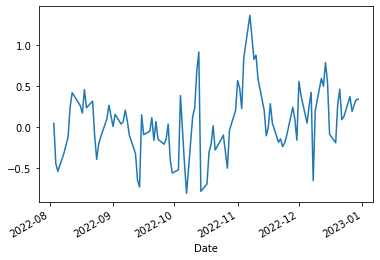

In [10]:
spread=z1-z2
spread.plot();

Calculating the upper and lower bollinger bands(in which 96% of data usually falls)

In [11]:
spread_mean=spread.rolling(window=roll).mean()
spread_sd=spread.rolling(window=roll).std()

In [12]:
upper_bound=spread_mean+2*spread_sd
lower_bound=spread_mean-2*spread_sd

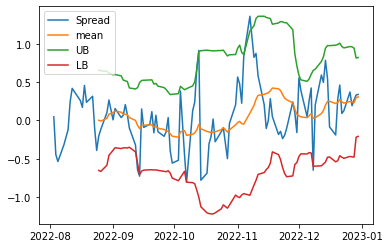

In [13]:
plt.plot(spread,label='Spread')
plt.plot(spread_mean,label='mean')
plt.plot(upper_bound,label='UB')
plt.plot(lower_bound,label='LB')
plt.legend();

Calculation for signals

In [13]:
long_signal=(spread<lower_bound).astype(int)
short_signal=(spread>upper_bound).astype(int)

In [14]:
# Positions for each asset
asset1_position=long_signal-short_signal
asset2_position=short_signal-long_signal

Plotting the signals according to the data without positions extended

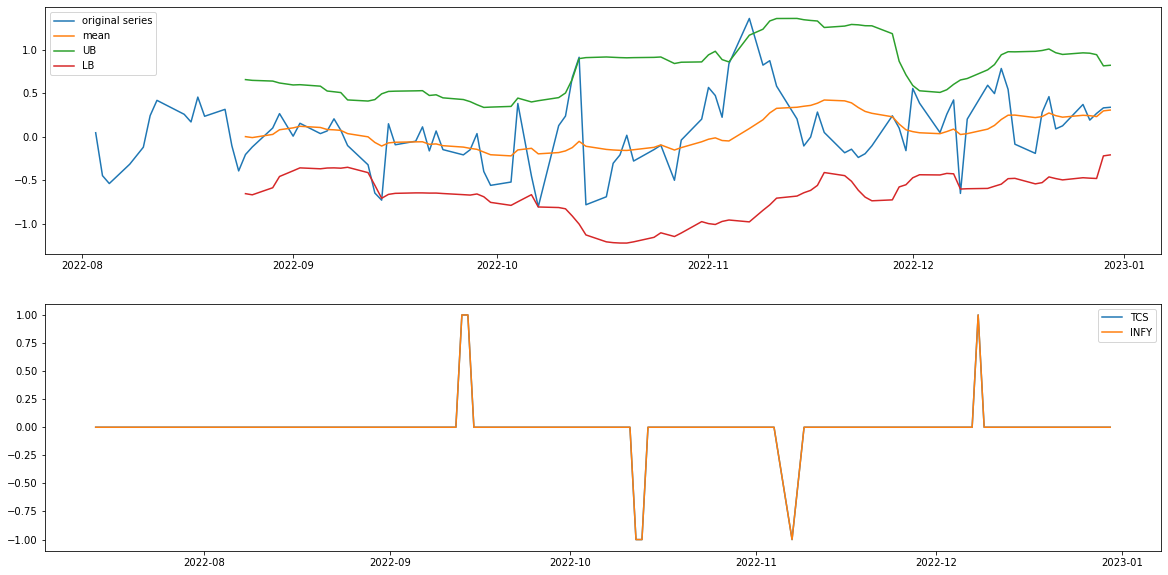

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(spread,label='original series')
plt.plot(spread_mean,label='mean')
plt.plot(upper_bound,label='UB')
plt.plot(lower_bound,label='LB')
plt.legend()
plt.subplot(212)
plt.plot(asset1_position,label='TCS')
plt.plot(asset1_position,label='INFY')
plt.legend();

Calculating daily returns

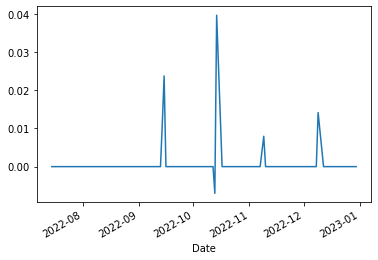

In [16]:
asset1_returns=asset1.pct_change()
asset2_returns=asset2.pct_change()
daily_return=asset1_position.shift(1)*asset1_returns+asset2_position.shift(1)*asset2_returns
daily_return.plot();

Cummulative return after analysis without extending positions

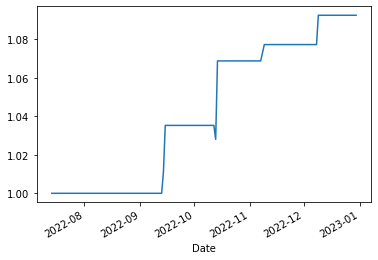

In [17]:
cummulative_return=(daily_return.fillna(value=0)+1).cumprod()
cummulative_return.plot();

<h1>Carrying out the analysis with extending the Positions</h1>

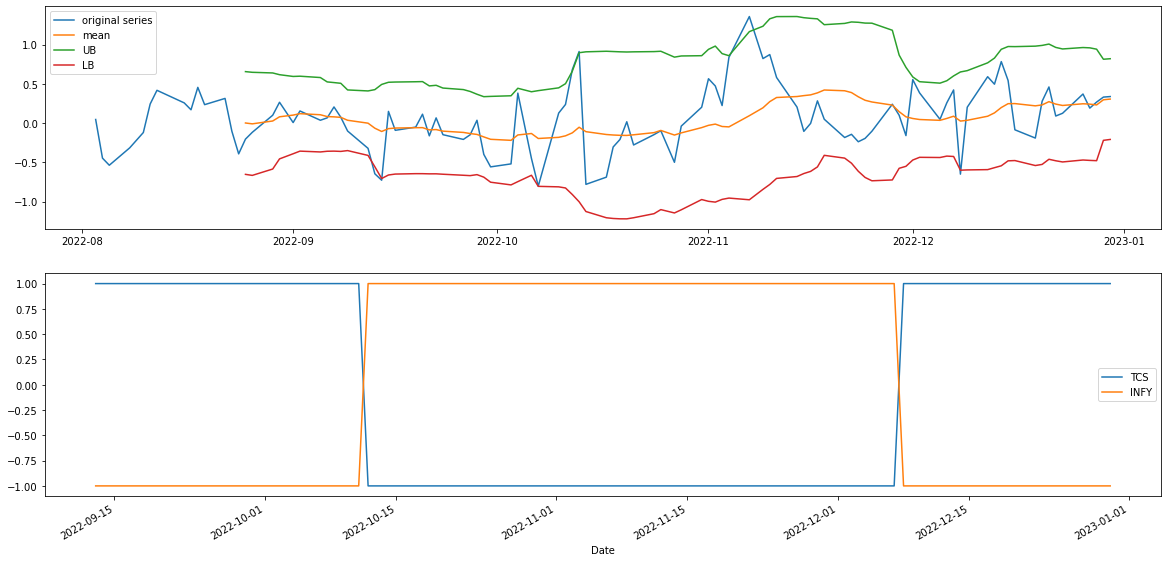

In [18]:
# Extend positions
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(spread,label='original series')
plt.plot(spread_mean,label='mean')
plt.plot(upper_bound,label='UB')
plt.plot(lower_bound,label='LB')
plt.legend()
plt.subplot(212)
position1_filled=asset1_position.copy()
position1_filled[asset1_position==0]=np.nan
position1_filled=position1_filled.ffill()

position2_filled=asset2_position.copy()
position2_filled[asset2_position==0]=np.nan
position2_filled=position2_filled.ffill()

position1_filled.plot(label='TCS');
position2_filled.plot(label='INFY');
plt.legend()

Plotting daily returns

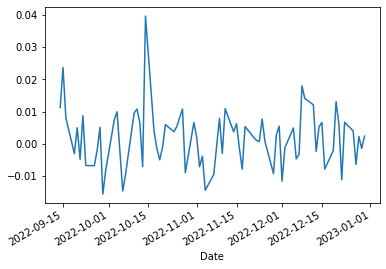

In [19]:
asset1_returns=asset1.pct_change()
asset2_returns=asset2.pct_change()
daily_returns2=position1_filled.shift(1)*asset1_returns+position2_filled.shift(1)*asset2_returns
daily_returns2.plot();

Cummulative returns after extending the positions

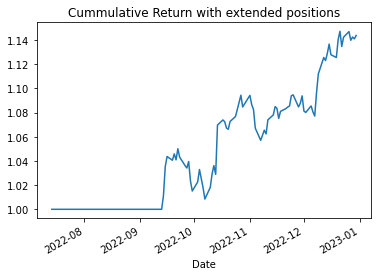

In [20]:
cummulative_return2=(daily_returns2.fillna(value=0)+1).cumprod()
cummulative_return2.plot()
plt.title('Cummulative Return with extended positions');

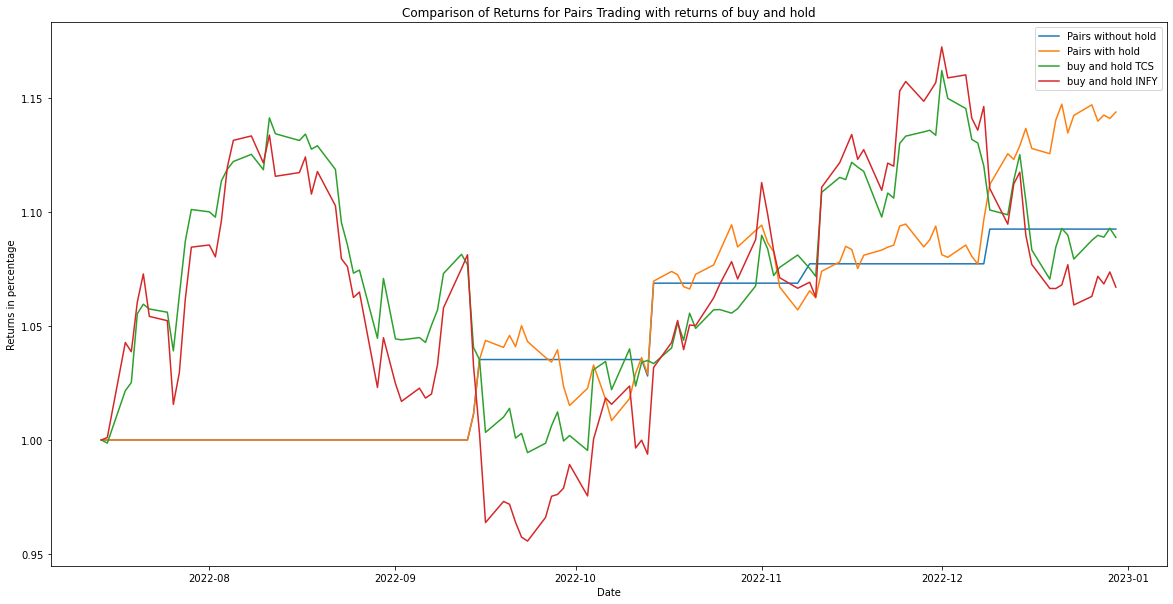

In [21]:
plt.figure(figsize=(20,10))
plt.plot(cummulative_return,label='Pairs without hold')
plt.plot(cummulative_return2,label='Pairs with hold')
plt.plot(asset1/asset1.iloc[0],label='buy and hold TCS')
plt.plot(asset2/asset2.iloc[0],label='buy and hold INFY')
plt.title('Comparison of Returns for Pairs Trading with returns of buy and hold')
plt.ylabel('Returns in percentage')
plt.xlabel('Date')
plt.legend();

In [22]:
returns_comparison={'Buy and hold TCS':((asset1/asset1.iloc[0])[-1]-1)*100,'Buy and hold INFY':((asset2/asset2.iloc[0])[-1]-1)*100,'Pairs without hold':(cummulative_return[-1]-1)*100,'Pairs with hold':(cummulative_return2[-1]-1)*100}
returns_comparison

{'Buy and hold TCS': 8.882977611550636,
 'Buy and hold INFY': 6.706967447967149,
 'Pairs without hold': 9.249501145838334,
 'Pairs with hold': 14.384302437938313}

Conclusion: Pairs Trading gave us more return as compared to buy and hold hence our statistical analysis of correlation between TCS and Infosys helped us to get more return than buying and holding.